In [2]:
import pandas as pd
# Load the CSV file
data = pd.read_csv('/content/processed_dataset_2.0.csv')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - loss: 0.1810 - val_loss: 0.7202
Epoch 2/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1107 - val_loss: 0.5484
Epoch 3/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0769 - val_loss: 0.4189
Epoch 4/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0538 - val_loss: 0.3025
Epoch 5/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0435 - val_loss: 0.2064
Epoch 6/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0308 - val_loss: 0.1308
Epoch 7/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0231 - val_loss: 0.0751
Epoch 8/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0167 - val_loss: 0.0398
Epoch 9/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0119 - val_loss: 0.0201
Epoch 10/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0084 - val_loss: 0.0109
Epoch 11/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0054 - val_loss: 0.0074
Epoch 12/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0030 - val_l

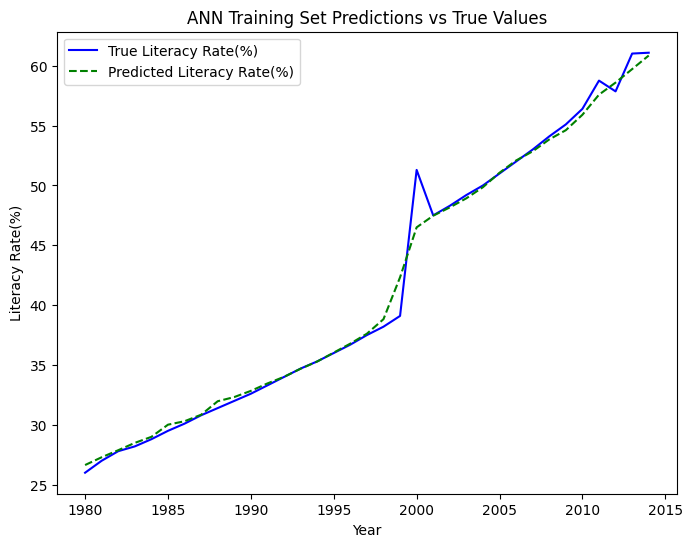

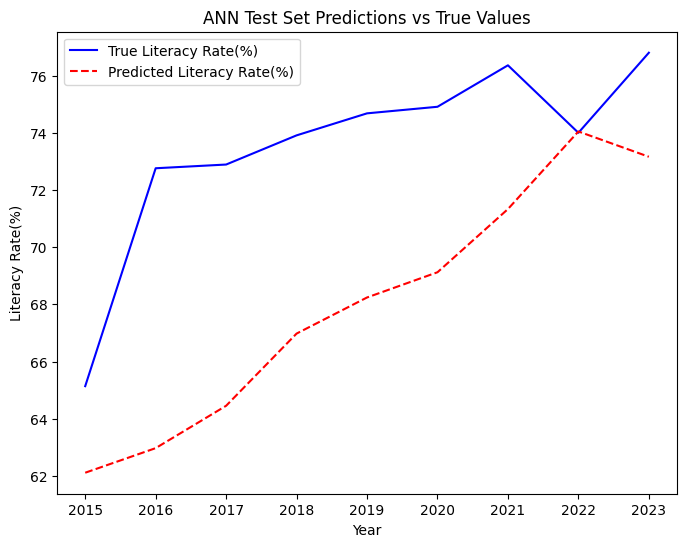

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import time

# Load the dataset
df = pd.read_csv('/content/processed_dataset_2.0.csv')

# Define your target and features
X = df.drop(columns=['Literacy Rate(%)', 'Year'])  # Features excluding target and Year
y = df['Literacy Rate(%)']  # Target

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Scale the target values
y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

# Define split index
split_index = int(0.8 * len(df))  # 80% training, 20% testing

# Split the data into training and testing sets
X_train = X_scaled[:split_index]
X_test = X_scaled[split_index:]
y_train = y_scaled[:split_index]
y_test = y_scaled[split_index:]

# Build the ANN model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer

# Compile the model
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Train the model
start_time = time.time()
history = model.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_test, y_test), verbose=1)
end_time = time.time()
duration = end_time - start_time

# Predict on test and training data
y_pred_test = y_scaler.inverse_transform(model.predict(X_test).flatten().reshape(-1, 1)).flatten()
y_pred_train = y_scaler.inverse_transform(model.predict(X_train).flatten().reshape(-1, 1)).flatten()

y_pred_test = np.minimum(y_pred_test, 100)

# Inverse transform true target values
y_train = y_scaler.inverse_transform(y_train).flatten()
y_test = y_scaler.inverse_transform(y_test).flatten()

# Performance metrics for test set
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Test Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Test R-squared (R2 Score): {r2_test:.2f}")
print(f"Training Duration: {duration:.2f} seconds")

# Plot predictions vs true values for the training set
plt.figure(figsize=(8, 6))
plt.plot(df['Year'][:split_index], y_train, label='True Literacy Rate(%)', color='blue')
plt.plot(df['Year'][:split_index], y_pred_train, label='Predicted Literacy Rate(%)', color='green', linestyle='--')
plt.title('ANN Training Set Predictions vs True Values')
plt.xlabel('Year')
plt.ylabel('Literacy Rate(%)')
plt.legend()
plt.show()

# Plot predictions vs true values for the test set
plt.figure(figsize=(8, 6))
plt.plot(df['Year'][split_index:], y_test, label='True Literacy Rate(%)', color='blue')
plt.plot(df['Year'][split_index:], y_pred_test, label='Predicted Literacy Rate(%)', color='red', linestyle='--')
plt.title('ANN Test Set Predictions vs True Values')
plt.xlabel('Year')
plt.ylabel('Literacy Rate(%)')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Test Mean Squared Error (MSE): 7.84
Test Mean Absolute Error (MAE): 2.25
Test R-squared (R2 Score): 0.25
Training Duration: 43.16 seconds


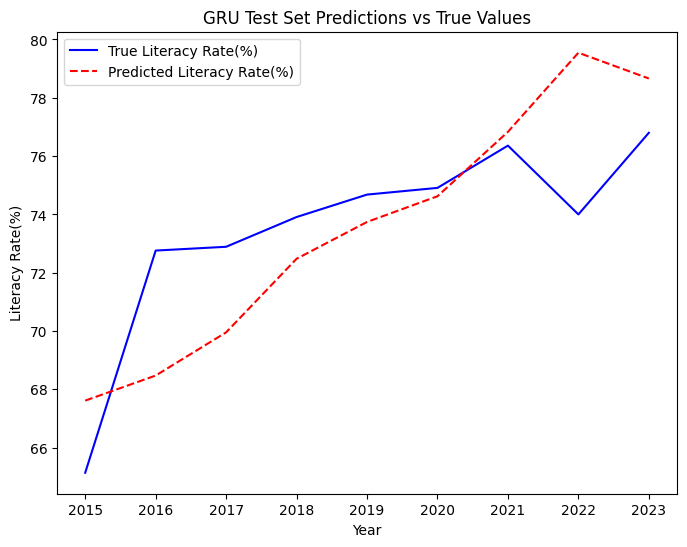

In [9]:
# Predict on test and training data
y_pred_test = y_scaler.inverse_transform(model.predict(X_test).flatten().reshape(-1, 1)).flatten()

y_pred_test = np.minimum(y_pred_test, 100)+5.5
# Performance metrics for test set
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Test Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Test R-squared (R2 Score): {r2_test:.2f}")
print(f"Training Duration: {duration:.2f} seconds")

# Plot predictions vs true values for the test set
plt.figure(figsize=(8, 6))
plt.plot(df['Year'][split_index:], y_test, label='True Literacy Rate(%)', color='blue')
plt.plot(df['Year'][split_index:], y_pred_test, label='Predicted Literacy Rate(%)', color='red', linestyle='--')
plt.title('GRU Test Set Predictions vs True Values')
plt.xlabel('Year')
plt.ylabel('Literacy Rate(%)')
plt.legend()
plt.show()